### Introduction

To learn about possibillities of alignment analisys, take a look at [biopython](http://biopython.org/DIST/docs/tutorial/Tutorial.html). To start, [this](https://nbviewer.org/github/cgoliver/Notebooks/blob/master/COMP_364/L25/L25.ipynb) and [this](http://training.scicomp.jic.ac.uk/docs/phylogenetics_course_book/tree_building_excercises.html) tutorials can also be used.

To start the tests we search for HIV-1's gp120 [sequences](https://www.ncbi.nlm.nih.gov/nuccore/?term=hiv-1%20gp160). Here we use a selection of the 13312 sequences to perform the tests.

We also use [MAFFT](https://mafft.cbrc.jp/alignment/software/), [i-qtree](http://www.iqtree.org/doc/Tutorial) and [ETE Toolkit](http://etetoolkit.org/docs/latest/tutorial/tutorial_phylogeny.html) for visualization. Take a look at the [online version](https://www.genome.jp/tools-bin/ete).

We can later invetigate [protein structures](https://blog.jcharistech.com/2020/04/24/protein-sequence-analysis-of-covid19-using-biopython/).

#### Basic sequence handling

In [1]:
!pip install biopython

     |████████████████████████████████| 2.3 MB 12.6 MB/s 


In [2]:
# import module to be used
from Bio import SeqIO

In [4]:
!wget https://raw.githubusercontent.com/computational-chemical-biology/hiv-1gp160/master/sequence.fasta

--2021-11-16 17:32:17--  https://raw.githubusercontent.com/computational-chemical-biology/hiv-1gp160/master/sequence.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘sequence.fasta’

sequence.fasta      100%[===================>]   3.13K  --.-KB/s    in 0s      

2021-11-16 17:32:17 (65.2 MB/s) - ‘sequence.fasta’ saved [3203/3203]



In [5]:
records = []
for record in SeqIO.parse("sequence.fasta", "fasta"):
    print(record.id)
    #print(record.name)
    print(record.description)
    records.append(record)

HE583229.1
HE583229.1
HE583264.1
HE583264.1
HE583260.1
HE583260.1
HE583255.1
HE583255.1
HE583251.1
HE583251.1
HE583249.1
HE583249.1
HE583245.1
HE583245.1


In [6]:
# one can also obtain sequences from NCBI
from Bio import Entrez

records[0].id

'HE583229.1'

In [7]:
handle = Entrez.efetch(db="nucleotide", id=records[0].id, retmode="xml")
seq = Entrez.read(handle)
seq

/usr/local/lib/python3.7/dist-packages/Bio/Entrez/__init__.py:670: UserWarning: 
Email address is not specified.

To make use of NCBI's E-utilities, NCBI requires you to specify your
email address with each request.  As an example, if your email address
is A.N.Other@example.com, you can specify it as follows:
   from Bio import Entrez
   Entrez.email = 'A.N.Other@example.com'
In case of excessive usage of the E-utilities, NCBI will attempt to contact
a user at the email address provided before blocking access to the
E-utilities.
  UserWarning,


[{'GBSeq_locus': 'HE583229', 'GBSeq_length': '329', 'GBSeq_strandedness': 'double', 'GBSeq_moltype': 'DNA', 'GBSeq_topology': 'linear', 'GBSeq_division': 'VRL', 'GBSeq_update-date': '28-JAN-2013', 'GBSeq_create-date': '27-SEP-2012', 'GBSeq_definition': 'HIV-1 M:G_PT5236 vpu gene (partial) and gp160 gene (partial)', 'GBSeq_primary-accession': 'HE583229', 'GBSeq_accession-version': 'HE583229.1', 'GBSeq_other-seqids': ['emb|HE583229.1|', 'gi|407227845'], 'GBSeq_source': 'HIV-1 M:G_PT5236', 'GBSeq_organism': 'HIV-1 M:G_PT5236', 'GBSeq_taxonomy': 'Viruses; Riboviria; Pararnavirae; Artverviricota; Revtraviricetes; Ortervirales; Retroviridae; Orthoretrovirinae; Lentivirus', 'GBSeq_references': [{'GBReference_reference': '1', 'GBReference_position': '1..329', 'GBReference_authors': ['Freitas,F.B.', 'Esteves,A.', 'Piedade,J.', 'Parreira,R.'], 'GBReference_title': 'Novel multiregion hybridization assay for the identification of the most prevalent genetic forms of the human immunodeficiency virus

In [8]:
type(seq[0])

Bio.Entrez.Parser.DictionaryElement

In [9]:
seq[0].keys()

dict_keys(['GBSeq_locus', 'GBSeq_length', 'GBSeq_strandedness', 'GBSeq_moltype', 'GBSeq_topology', 'GBSeq_division', 'GBSeq_update-date', 'GBSeq_create-date', 'GBSeq_definition', 'GBSeq_primary-accession', 'GBSeq_accession-version', 'GBSeq_other-seqids', 'GBSeq_source', 'GBSeq_organism', 'GBSeq_taxonomy', 'GBSeq_references', 'GBSeq_feature-table', 'GBSeq_sequence'])

In [10]:
seq[0]['GBSeq_sequence']

'ttgatggaacaagagaaagagcacaagacagtggaaatgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatccttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggggtacctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcatatagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacccacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata'

In [11]:
from Bio.Seq import Seq

my_seq = Seq(seq[0]['GBSeq_sequence'])
my_seq.transcribe()

Seq('uugauggaacaagagaaagagcacaagacaguggaaaugaaagcgagggggaca...aua')

In [12]:
print(my_seq.transcribe())

uugauggaacaagagaaagagcacaagacaguggaaaugaaagcgagggggacacggaggaauuggcaacccuuguggaaaugggggacuuugauccuuggguuggugauaauuuguagugccucaaauaacuugugggucacagucuauuaugggguaccugugugggaggaugcagauaccacucuauuuugugcaucugaugcuaaagcauauaguacugaaagccauaauaucugggcuacacaugccuguguacccacagaccccaacccacaagagauaucucuggauaauguaacagaaaauuuuaacauguggaaaaaaua


In [13]:
!wget https://mafft.cbrc.jp/alignment/software/mafft_7.490-1_amd64.deb

--2021-11-16 17:33:40--  https://mafft.cbrc.jp/alignment/software/mafft_7.490-1_amd64.deb
Resolving mafft.cbrc.jp (mafft.cbrc.jp)... 133.1.49.95
Connecting to mafft.cbrc.jp (mafft.cbrc.jp)|133.1.49.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642654 (3.5M)
Saving to: ‘mafft_7.490-1_amd64.deb’

mafft_7.490-1_amd64 100%[===================>]   3.47M  1.83MB/s    in 1.9s    

2021-11-16 17:33:43 (1.83 MB/s) - ‘mafft_7.490-1_amd64.deb’ saved [3642654/3642654]



In [14]:
!dpkg -i mafft_7.490-1_amd64.deb

Selecting previously unselected package mafft.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack mafft_7.490-1_amd64.deb ...
Unpacking mafft (7.490-1) ...
Setting up mafft (7.490-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [15]:
# use a command line tool
!mafft sequence.fasta > seq_align.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1 ambiguous characters.
    1 / 7
done.

Constructing a UPGMA tree (efffree=0) ... 
    0 / 7
done.

Progressive alignment 1/2... 
STEP     3 / 6  f
Reallocating..done. *alloclen = 2086
STEP     6 / 6  f
done.

Making a distance matrix from msa.. 
    0 / 7
done.

Constructing a UPGMA tree (efffree=1) ... 
    0 / 7
done.

Progressive alignment 2/2... 
STEP     4 / 6  f
Reallocating..done. *alloclen = 2092
STEP     6 / 6  f
done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the maf

In [16]:
!ls

mafft_7.490-1_amd64.deb  sample_data  seq_align.fasta  sequence.fasta


In [17]:
!apt install iqtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  iqtree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,689 kB of archives.
After this operation, 16.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 iqtree amd64 1.6.1+dfsg-1 [2,689 kB]
Fetched 2,689 kB in 0s (12.4 MB/s)
Selecting previously unselected package iqtree.
(Reading database ... 155300 files and directories currently installed.)
Preparing to unpack .../iqtree_1.6.1+dfsg-1_amd64.deb ...
Unpacking iqtree (1.6.1+dfsg-1) ...
Setting up iqtree (1.6.1+dfsg-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [18]:
!iqtree -s seq_align.fasta

IQ-TREE multicore version 1.6.1 for Linux 64-bit built Feb 16 2018
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor,
Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    2d3432b06d84 (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s seq_align.fasta
Seed:    305298 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue Nov 16 17:37:13 2021
Kernel:  AVX+FMA - 1 threads (2 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 2 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file seq_align.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 7 sequences with 563 columns, 177 distinct patterns
76 parsimony-informative, 100 singleton sites, 387 constant sites
            Gap/Ambiguity  Composition  p-value
   1  HE583229.1   41.56%    passed     57.80%
   2  HE583264.1    7.64%    passed     88.11%
   3  HE583260.1   51.69%    

In [2]:
f = open('seq_align.fasta.treefile')
strtree = f.readline().strip()
f.close()

strtree

'(HE583229.1:0.0379699663,((HE583264.1:0.0092242687,HE583249.1:0.0656921467):0.0123473620,((HE583260.1:0.1598263619,HE583255.1:0.0525960036):0.1539001348,HE583251.1:0.0394047197):0.0671351866):0.0084399519,HE583245.1:0.0167209486);'

In [20]:
!pip install PyQt5 ete3

     |████████████████████████████████| 8.3 MB 11.4 MB/s 
     |████████████████████████████████| 4.7 MB 61.7 MB/s 
     |████████████████████████████████| 317 kB 65.9 MB/s 
     |████████████████████████████████| 59.9 MB 22 kB/s 
  Created wheel for ete3: filename=ete3-3.1.2-py3-none-any.whl size=2273013 sha256=cbfd20d9f5dfd4f749dfed39028d0df68dd8e50c829ebf0c0e48421c696eb5a1
  Stored in directory: /root/.cache/pip/wheels/17/fd/e2/6ac384d8c2484789304657dde01b96d7ab83f4f1dd96d266df
Successfully built ete3


In [5]:
import os
import PyQt5
from ete3 import PhyloTree, TreeStyle
os.environ['QT_QPA_PLATFORM']='offscreen'

t = PhyloTree(strtree)
print(t)


   /-HE583229.1
  |
  |      /-HE583264.1
  |   /-|
  |  |   \-HE583249.1
  |--|
--|  |      /-HE583260.1
  |  |   /-|
  |   \-|   \-HE583255.1
  |     |
  |      \-HE583251.1
  |
   \-HE583245.1


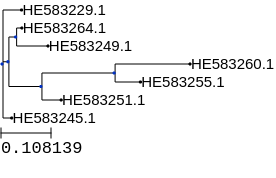

In [6]:
t.render("%%inline")

In [7]:
t.render("hiv-1_tree.pdf")

{'faces': [[22.556037057200626,
   1.0,
   106.55603705720063,
   19.0,
   1,
   'HE583229.1'],
  [22.87634774568756, 19.0, 106.87634774568755, 37.0, 4, 'HE583264.1'],
  [48.9851978530811, 37.0, 132.9851978530811, 55.0, 5, 'HE583249.1'],
  [191.0, 55.0, 275.0, 73.0, 8, 'HE583260.1'],
  [141.42028404508483, 73.0, 225.42028404508483, 91.0, 9, 'HE583255.1'],
  [62.16282441343313, 91.0, 146.16282441343313, 109.0, 10, 'HE583251.1'],
  [12.731204998545053, 109.0, 96.73120499854505, 127.0, 11, 'HE583245.1']],
 'node_areas': {0: [1.0, 1.0, 275.0, 127.0],
  1: [3.0, 1.0, 106.55603705720063, 19.0],
  2: [3.0, 19.0, 275.0, 109.0],
  3: [8.902350271967212, 19.0, 132.9851978530811, 55.0],
  4: [16.611355729543057, 19.0, 106.87634774568755, 37.0],
  5: [16.611355729543057, 37.0, 132.9851978530811, 55.0],
  6: [8.902350271967212, 55.0, 275.0, 109.0],
  7: [41.943405575502695, 55.0, 275.0, 91.0],
  8: [115.10165860921613, 55.0, 275.0, 73.0],
  9: [115.10165860921613, 73.0, 225.42028404508483, 91.0],
 

In [8]:
f = open('seq_align.fasta')
fasta_txt = []
for line in f:
    fasta_txt.append(line.strip())
f.close()
t.link_to_alignment(alignment='\n'.join(fasta_txt), alg_format="fasta")

In [9]:
print('\n'.join(fasta_txt))

>HE583229.1
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------ttgatggaacaagagaaagagcacaagacagtggaa
atgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatc
cttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggg
gt--acctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcat
atagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacc
cacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata-----
-----------------------
>HE583264.1
----------------------aaggatcatcaaaatcctgtaccaaagcagtaagtagt
aataactagtatatgtaatgcaacccttagaaatagctgcaatagtaggactaatagtag
cagtcatagcagccataattgtgtggatcatagtctttatacaatataaggaaataagaa
aacagaaagaaatacaaaggatacttgataaaataagagaaagagcagaagacagtggaa
atgagagcgaaggggacacagatgaattggcaacccttgtggagatgggggattttgatc
cttgggttggggataatttgtagtgcctcaaaggacttgtgggtcacagtctattatggg
gt--acctgtgtgggaagatgcagataccactctatt

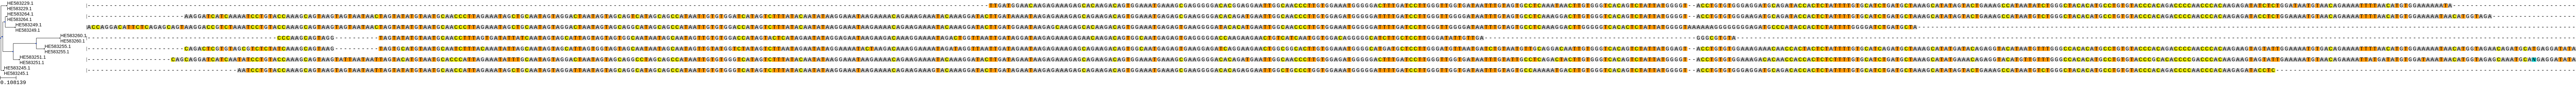

In [10]:
ts = TreeStyle()
t.render("%%inline", tree_style=ts)

In [11]:
for leaf in t.iter_leaves():
    print(leaf.name, leaf.sequence)

HE583229.1 ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ttgatggaacaagagaaagagcacaagacagtggaaatgaaagcgagggggacacggaggaattggcaacccttgtggaaatgggggactttgatccttgggttggtgataatttgtagtgcctcaaataacttgtgggtcacagtctattatggggt--acctgtgtgggaggatgcagataccactctattttgtgcatctgatgctaaagcatatagtactgaaagccataatatctgggctacacatgcctgtgtacccacagaccccaacccacaagagatatctctggataatgtaacagaaaattttaacatgtggaaaaaata----------------------------
HE583264.1 ----------------------aaggatcatcaaaatcctgtaccaaagcagtaagtagtaataactagtatatgtaatgcaacccttagaaatagctgcaatagtaggactaatagtagcagtcatagcagccataattgtgtggatcatagtctttatacaatataaggaaataagaaaacagaaagaaatacaaaggatacttgataaaataagagaaagagcagaagacagtggaaatgagagcgaaggggacacagatgaattggcaacccttgtggagatgggggattttgatccttgggttggggataatttgtagtgcctcaaaggacttgtgggtcacagtctattatggggt--acctgtgtgggaagatgcagataccactctattttgtgcatctgatgcta